In [1]:
library(ktplots)
library(ggplot2)

In [2]:
pvals <- read.delim("results/degs_analysis_relevant_interactions_06_25_2024_103453.txt", check.names = FALSE, stringsAsFactors = F)
means <- read.delim("results/degs_analysis_means_06_25_2024_103453.txt", check.names = FALSE, stringsAsFactors = F)
decon = read.csv("results/degs_analysis_deconvoluted_06_25_2024_103453.txt", sep="\t", stringsAsFactors = F)

In [3]:
# load h5ad as Single Cell Experiment
library(schard)
counts.sce = schard::h5ad2sce('input/dataset_counts_normloqTransformed.h5ad')
counts(counts.sce) <- assay(counts.sce, "X") # fill counts just fon convenience for plot_cpdb3

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

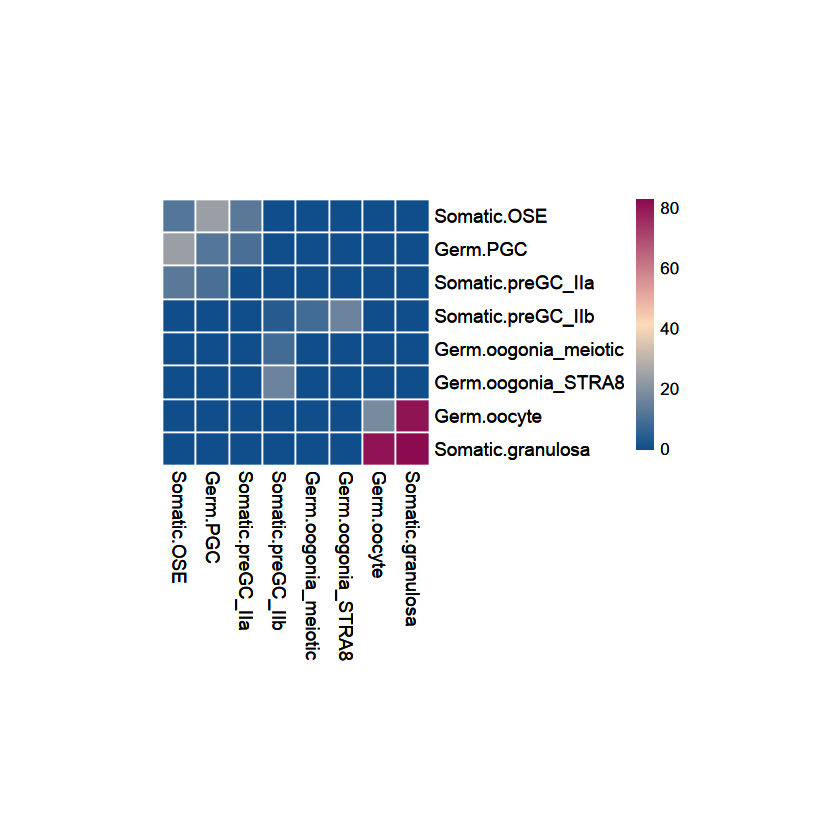

In [4]:
plot_cpdb_heatmap(pvals = pvals, cellheight = 20, cellwidth = 20, degs_analysis = TRUE)

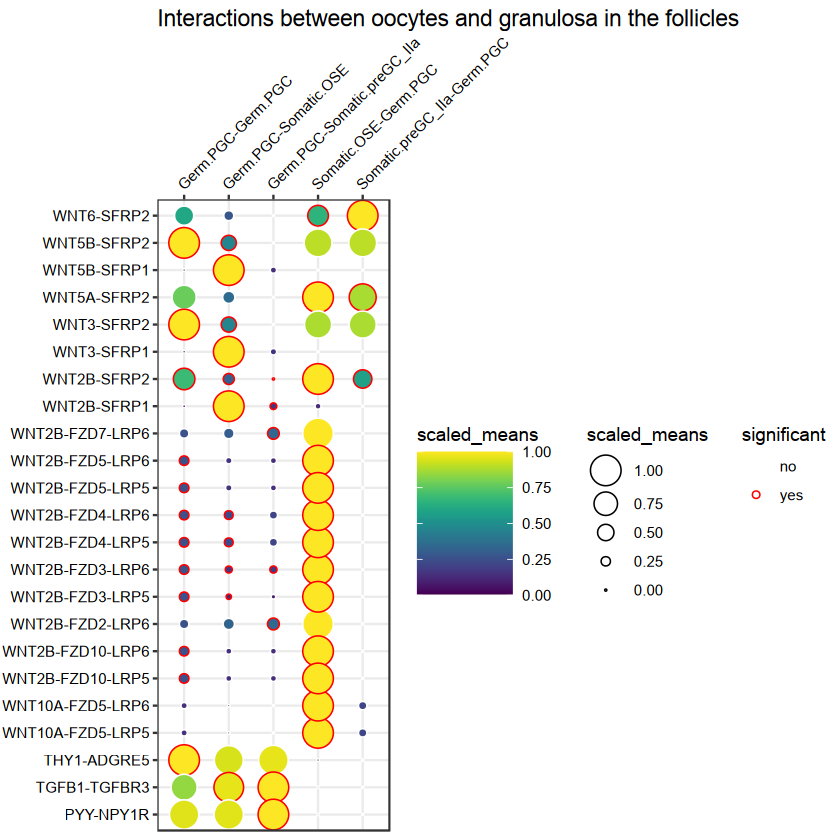

In [5]:
plot_cpdb(
    scdata=counts.sce,
    cell_type1 = ".",
    cell_type2 = "Germ.PGC", 
    celltype_key="celltype",
    means=means,
    pvals=pvals,
    degs_analysis = TRUE,
#     genes=c("PTPRC", "TNFSF13"),
    title="Interactions between oocytes and granulosa in the follicles",
)
ggsave(filename = 'ktplots_dotplot_PGC.pdf', width = 8, height = 7, dpi = 300)

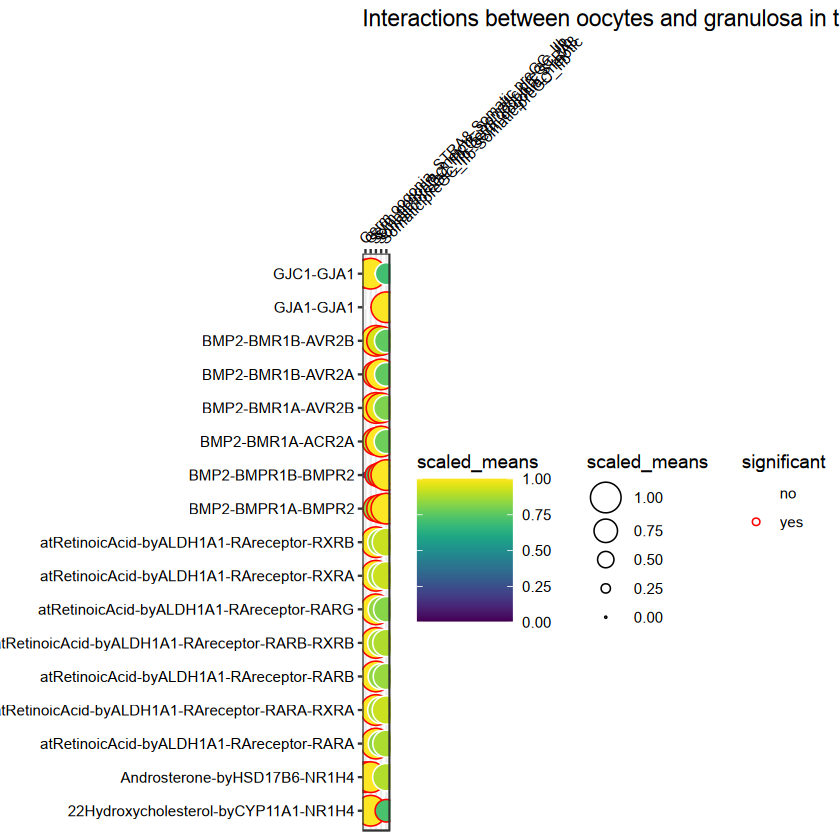

In [6]:
plot_cpdb(
    scdata=counts.sce,
    cell_type1 = c("Somatic.preGC_IIb"),
    cell_type2 = ".", 
    celltype_key="celltype",
    means=means,
    pvals=pvals,
    degs_analysis = TRUE,
#     genes=c("PTPRC", "TNFSF13"),
    title="Interactions between oocytes and granulosa in the follicles",
)
ggsave(filename = 'ktplots_dotplot_oogonia.pdf', width = 10, height = 7, dpi = 300)

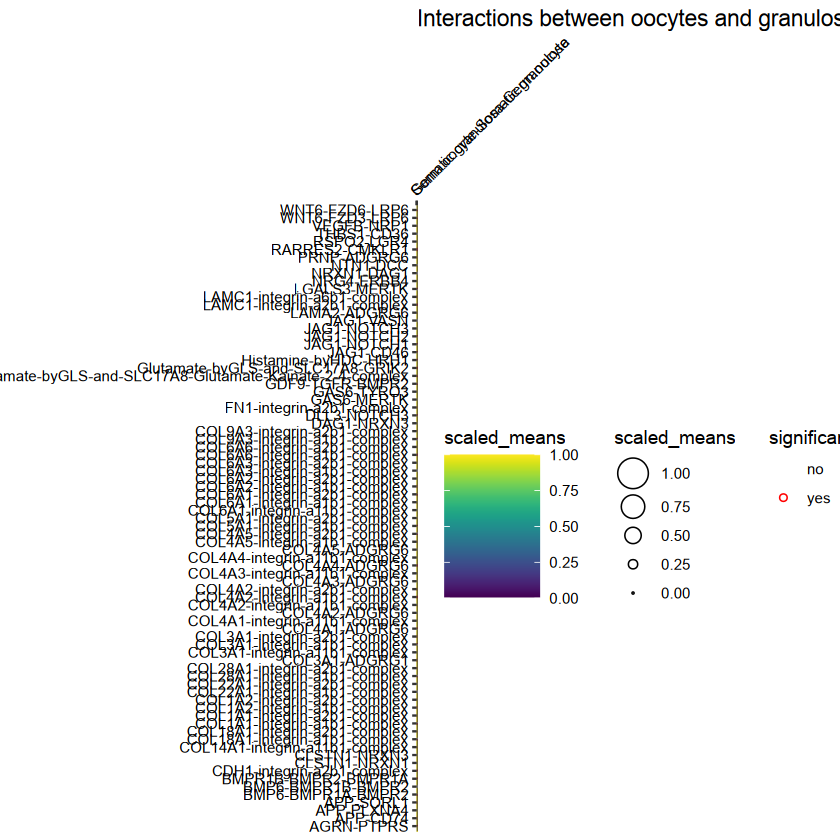

In [7]:
plot_cpdb(
    scdata=counts.sce,
    cell_type1 = "Somatic.granulosa",
    cell_type2 = "Germ.oocyte", 
    celltype_key="celltype",
    means=means,
    pvals=pvals,
    degs_analysis = TRUE,
#     genes=c("PTPRC", "TNFSF13"),
    title="Interactions between oocytes and granulosa in the follicles",
)
ggsave(filename = 'ktplots_dotplot_oocyte.pdf', width = 6, height = 20, dpi = 300)

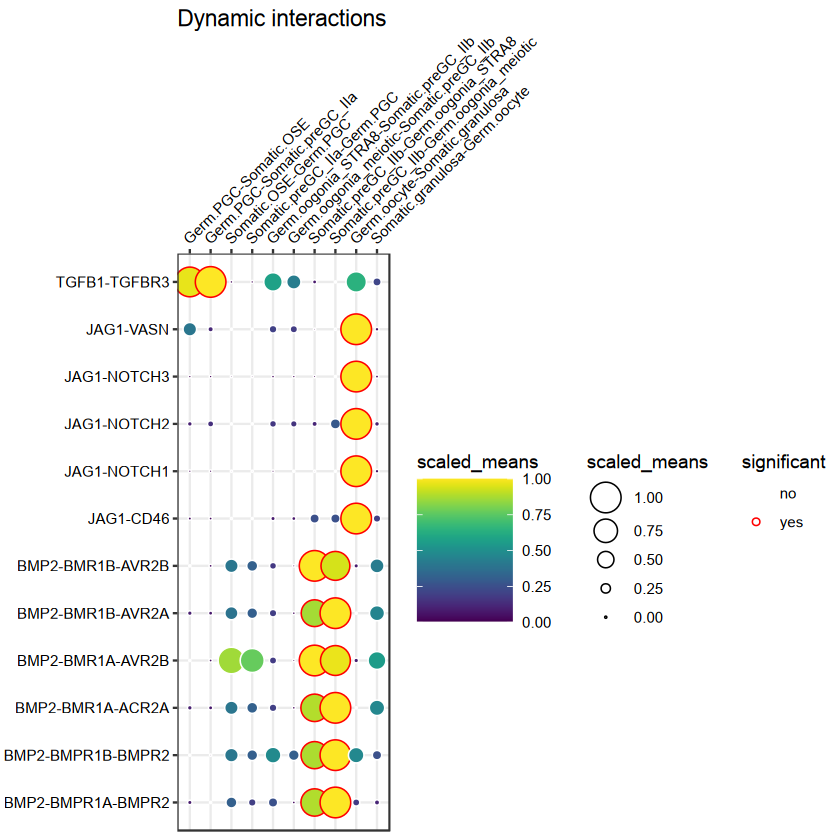

In [18]:
plot_cpdb(
    scdata=counts.sce,
    cell_type1 = "Somatic",
    cell_type2 = "Germ", 
    celltype_key="celltype",
    means=means,
    pvals=pvals,
    degs_analysis = TRUE,
    standard_scale = TRUE,
    genes=c("TGFB1", "BMP2", "JAG1"),
    title="Dynamic interactions",
)
ggsave(filename = 'ktplots_dotplot_selected.pdf', width = 8, height = 5.5, dpi = 300)

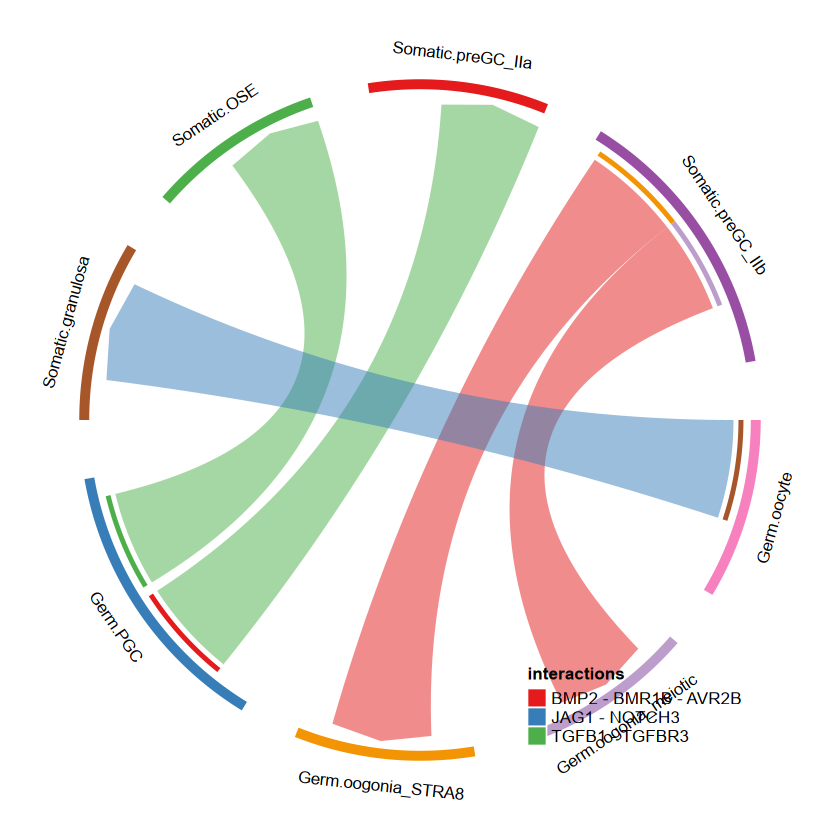

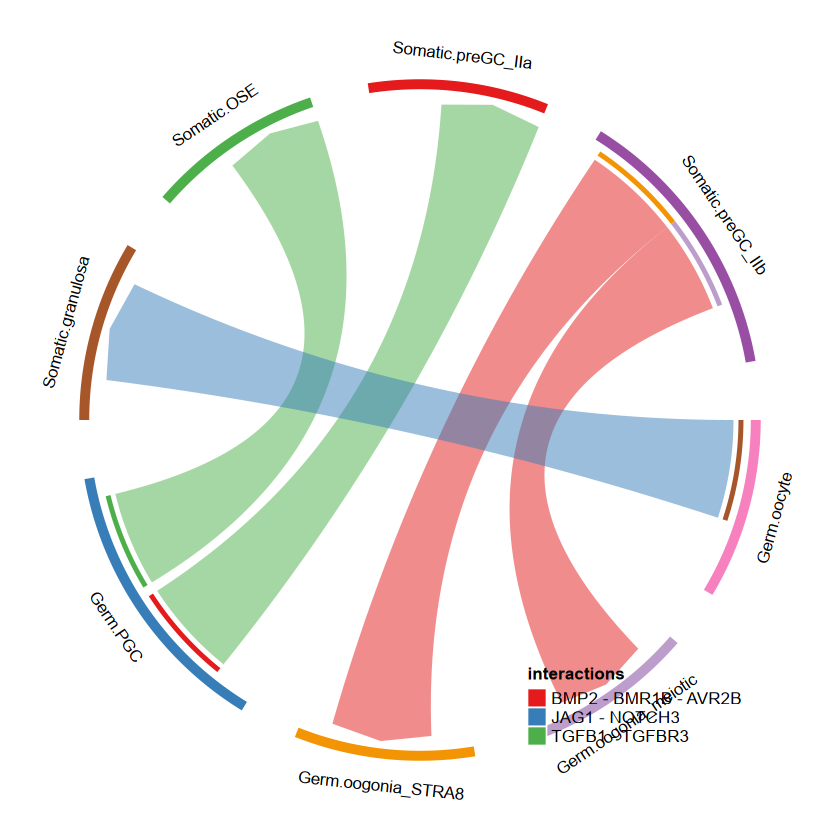

In [7]:
plot_cpdb4(
    scdata = counts.sce,
    interaction = c("JAG1-NOTCH3", 'TGFB1-TGFBR3', 'BMP2-BMR1B-AVR2B'),
    cell_type1 = ".",
    cell_type2 = ".",
    celltype_key = "celltype",
    means = means,
    pvals = pvals,
    degs_analysis = TRUE,
    keep_significant_only = F,
    deconvoluted = decon,
)
ggsave(filename = 'ktplots_chord.pdf', width = 6, height = 6, dpi = 300)

data provided is a SingleCellExperiment/SummarizedExperiment object
extracting expression matrix
attempting to subset the expression matrix to the 4 genes provided
found 4 genes in the expression matrix
no groups information provided. defaulting to celltype_key only
preparing the final dataframe ...
setting minimum percentage of cells expressing gene to be 5% of cluster/cell-type
the following genes are removed
NULL


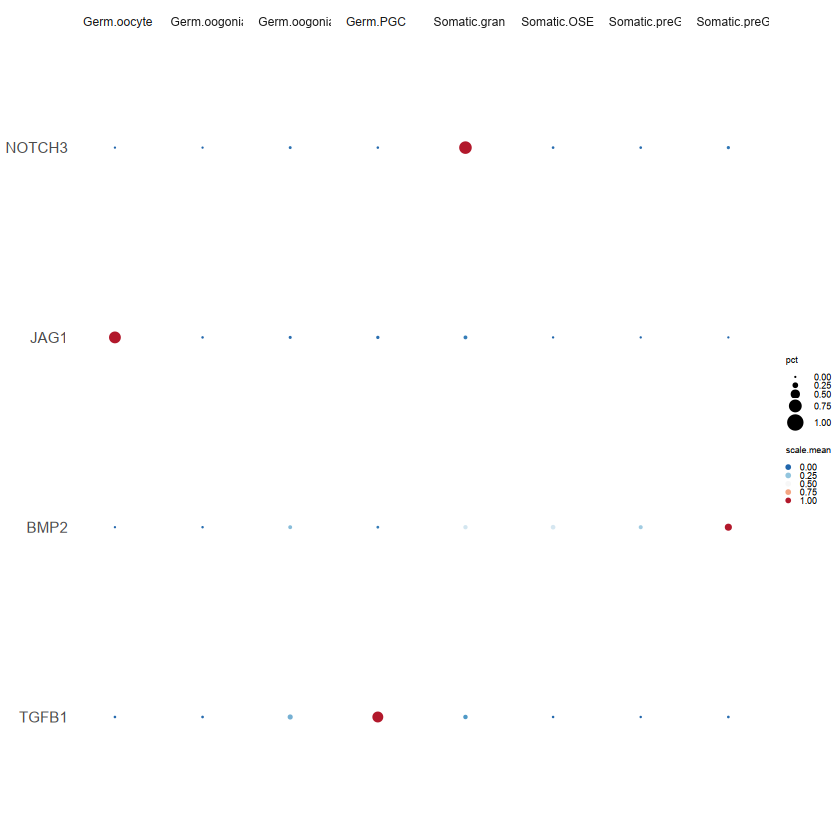

In [9]:
library(ggplot2)
# Note, this conflicts with tidyr devel version
geneDotPlot(
    scdata = counts.sce, # object
    genes = c("NOTCH3", "JAG1", 'BMP2', 'TGFB1'), # genes to plot
    celltype_key = "celltype", # column name in meta data that holds the cell-cluster ID/assignment
    standard_scale = TRUE
) + 
theme(strip.text.x = element_text(angle = 0, hjust = 0, size = 7)) + 
small_guide() + 
small_legend()

In [10]:
plot_cpdb3(
    scdata = counts.sce,
    cell_type1 = "Somatic.granulosa",
    cell_type2 = "Germ.oocyte", 
    celltype_key="celltype",
    means=means,
    pvals=pvals,
    interaction = "JAG1_NOTCH3",
    degs_analysis = TRUE,
    title="Interactions between oocytes and granulosa in the follicles",
    deconvoluted = decon # new options from here on specific to plot_cpdb3
)

ERROR: Error in dat$id_cp_interaction: $ operator is invalid for atomic vectors


In [ ]:
plot_cpdb3(
    scdata = counts.sce,
    cell_type1 = ".",
    cell_type2 = "Germ.oocyte", 
    celltype_key="celltype",
    means=means,
    pvals=pvals,
    interaction = "JAG1_NOTCH3",
    degs_analysis = TRUE,
    title="Interactions between oocytes and granulosa in the follicles",
    deconvoluted = decon # new options from here on specific to plot_cpdb3
)

In [ ]:
plot_cpdb3(
    scdata = counts.sce,
    cell_type1 = ".",
    cell_type2 = "Germ.oocyte", 
    celltype_key="celltype",
    means=means,
    pvals=pvals,
#     interaction = "JAG1_NOTCH3",
    degs_analysis = TRUE,
    title="Interactions between oocytes and granulosa in the follicles",
    deconvoluted = decon # new options from here on specific to plot_cpdb3
)

In [ ]:
plot_cpdb3(
    scdata = counts.sce,
    cell_type1 = "Somatic.granulosa",
    cell_type2 = "Germ.oocyte", 
    celltype_key="celltype",
    means=means,
    pvals=pvals,
#     interaction = "JAG1_NOTCH3",
    degs_analysis = TRUE,
    title="Interactions between oocytes and granulosa in the follicles",
    deconvoluted = decon # new options from here on specific to plot_cpdb3
)

In [ ]:
plot_cpdb3(
    scdata = counts.sce,
    cell_type1 = ".",
    cell_type2 = "Germ.oocyte", 
    celltype_key="celltype",
    means=means,
    pvals=pvals,
    interaction = "JAG1-NOTCH3",
    degs_analysis = TRUE,
    title="Interactions between oocytes and granulosa in the follicles",
    deconvoluted = decon # new options from here on specific to plot_cpdb3
)